## Trabalho não remunerado e desigualdade de gênero: uma perspectiva global

As estatísticas de utilização do tempo são cruciais para medir a qualidade de vida e o bem-estar, abrangendo todas as formas de trabalho, inclusive o doméstico não remunerado. Além disso, são fundamentais para monitorar a igualdade de gênero, empoderamento das mulheres e contribuem para o diálogo político sobre essa questão.


Definição acordada internacionalmente


"O trabalho doméstico não remunerado refere-se a atividades que incluem a gestão e preparação de alimentos e refeições, limpeza e manutenção da própria habitação e arredores, decoração “faça você mesmo”, manutenção e reparação de bens pessoais e domésticos, cuidado e manutenção de têxteis e calçado, gestão doméstica, cuidados com animais de estimação, compras para a própria casa e familiares e viagens relacionadas a serviços domésticos não remunerados listados anteriormente.

O trabalho de cuidados não remunerado refere-se a atividades relacionadas com cuidados e instrução de crianças, cuidados a familiares e familiares doentes, idosos ou deficientes, ajuda a agregados familiares e familiares adultos não dependentes e viagens relacionadas com estes serviços de cuidados não remunerados"

https://gender-data-hub-2-undesa.hub.arcgis.com/pages/indicators#Theme1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("trabalho_nao_remunerado.csv", sep="," , encoding= 'UTF-8')

In [10]:
df.dtypes

indicator_label         object
indicator_id            object
indicator_desc          object
minset_series           object
minset_series_desc      object
ref_area                 int64
ref_area_desc           object
iso3                    object
x                      float64
y                      float64
sdg_region              object
time_period              int64
time_detail             object
sex                     object
sex_desc                object
age                     object
age_desc                object
urbanization            object
urbanization_desc       object
obs_value              float64
unit_measure            object
unit_measure_desc       object
nature                  object
nature_desc             object
reporting_type          object
reporting_type_desc     object
comment_obs             object
source_detail           object
source_year              int64
dimensions              object
is_latest_year         float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indicator_label      2671 non-null   object 
 1   indicator_id         2671 non-null   object 
 2   indicator_desc       2671 non-null   object 
 3   minset_series        2671 non-null   object 
 4   minset_series_desc   2671 non-null   object 
 5   ref_area             2671 non-null   int64  
 6   ref_area_desc        2671 non-null   object 
 7   iso3                 2671 non-null   object 
 8   x                    2671 non-null   float64
 9   y                    2671 non-null   float64
 10  sdg_region           2671 non-null   object 
 11  time_period          2671 non-null   int64  
 12  time_detail          2671 non-null   object 
 13  sex                  2671 non-null   object 
 14  sex_desc             2671 non-null   object 
 15  age                  2671 non-null   o

## Observações a partir de df.info(), que são relevantes à nossa análise:

- O DataFrame possui 2671 entradas (linhas) e 31 colunas;
- O índice é do tipo RangeIndex (sem a especificação de um índice personalizado) variando de 0 a 2670;
- Existem colunas com diferentes tipos de dados, incluindo float64, int64, e object;
- 'Non-Null Count' indica que todas as colunas têm 2671 valores não nulos, indicando que não há valores ausentes para essas colunas;
- Para as colunas numéricas (float64 e int64), podemos obter estatísticas descritivas como média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo;
- A contagem de valores não nulos em "is_latest_year", mostra que há 1635 valores não nulos nessa coluna, indicando que existem valores ausentes para algumas entradas.


Agora, vamos visualizar melhor essa questão dos nulos em 'is_latest_year':

In [12]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
print(contagem_valores)


is_latest_year
1.0    1635
NaN    1036
Name: count, dtype: int64


A escolha de tratamento foi a seguinte:

In [13]:
df['is_latest_year'].fillna('Sem Informação', inplace=True)  


C:\Users\santi\AppData\Local\Temp\ipykernel_192\1257217855.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sem Informação' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['is_latest_year'].fillna('Sem Informação', inplace=True)


Confirmando:

In [14]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
display(contagem_valores)


is_latest_year
1.0               1635
Sem Informação    1036
Name: count, dtype: int64

In [15]:
display(df.columns)

Index(['indicator_label', 'indicator_id', 'indicator_desc', 'minset_series',
       'minset_series_desc', 'ref_area', 'ref_area_desc', 'iso3', 'x', 'y',
       'sdg_region', 'time_period', 'time_detail', 'sex', 'sex_desc', 'age',
       'age_desc', 'urbanization', 'urbanization_desc', 'obs_value',
       'unit_measure', 'unit_measure_desc', 'nature', 'nature_desc',
       'reporting_type', 'reporting_type_desc', 'comment_obs', 'source_detail',
       'source_year', 'dimensions', 'is_latest_year'],
      dtype='object')

In [16]:
linhas, colunas = df.shape
print(f'O DataFrame tem {linhas} linhas e {colunas} colunas.')


O DataFrame tem 2671 linhas e 31 colunas.


In [17]:
df.head(10)

,indicator_label,indicator_id,indicator_desc,minset_series,minset_series_desc,ref_area,ref_area_desc,iso3,x,y,sdg_region,time_period,time_detail,sex,sex_desc,age,age_desc,urbanization,urbanization_desc,obs_value,unit_measure,unit_measure_desc,nature,nature_desc,reporting_type,reporting_type_desc,comment_obs,source_detail,source_year,dimensions,is_latest_year
0,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,496,Mongolia,MNG,103.072806,46.838921,Eastern and South-Eastern Asia,2015,2015,F,Female,Y12T14,12 to 14 years old,_T,All areas,2.625000,HR_PER_DAY,Hours per day,C,Country Data,G,Global,Results provided for this questionnaire are pr...,National Statistical Office based on Time use ...,2022,"sex, age, urbanization",1.0
1,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,496,Mongolia,MNG,103.072806,46.838921,Eastern and South-Eastern Asia,2015,2015,M,Male,Y12T14,12 to 14 years old,_T,All areas,1.273500,HR_PER_DAY,Hours per day,C,Country Data,G,Global,Results provided for this questionnaire are pr...,National Statistical Office based on Time use ...,2022,"sex, age, urbanization",1.0
2,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,152,Chile,CHL,-71.230290,-35.265288,Latin America and the Caribbean,2015,2015,F,Female,Y12T24,12 to 24 years old,_T,All areas,3.372929,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Instituto Nacional de Estadísticas Chile based...,2022,"sex, age, urbanization",1.0
3,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,152,Chile,CHL,-71.230290,-35.265288,Latin America and the Caribbean,2015,2015,M,Male,Y12T24,12 to 24 years old,_T,All areas,1.729657,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Instituto Nacional de Estadísticas Chile based...,2022,"sex, age, urbanization",1.0
4,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,40,Austria,AUT,14.141725,47.587049,Europe and Northern America,2009,2008-2009,F,Female,Y_GE10,10 years old and over,_T,All areas,4.398877,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Statistics Austria based on Time Use Survey 20...,2022,"sex, age, urbanization",1.0
5,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,120,Cameroon,CMR,12.741983,5.692387,Sub-Saharan Africa,2014,2014,F,Female,Y_GE10,10 years old and over,_T,All areas,3.492163,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,"INS, Cameroun based on Fourth Cameroon Househo...",2022,"sex, age, urbanization",1.0
6,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,170,Colombia,COL,-73.074468,3.888209,Latin America and the Caribbean,2017,2016-2017,F,Female,Y_GE10,10 years old and over,_T,All areas,3.844214,HR_PER_DAY,Hours per day,C,Country Data,G,Global,"Include ""Time spent on transfers related to un...",DANE based on National Time Use Survey,2022,"sex, age, urbanization",1.0
7,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,170,Colombia,COL,-73.074468,3.888209,Latin America and the Caribbean,2013,2012-2013,F,Female,Y_GE10,10 years old and over,_T,All areas,0.635042,HR_PER_DAY,Hours per day,C,Country Data,G,Global,"Include ""Time spent on transfers related to un...",DANE based on National Time Use Survey,2022,"sex, age, urbanization",Sem Informação
8,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,246,Finland,FIN,23.308447,61.915867,Europe and Northern America,2000,1999-2000,F,Female,Y_GE10,10 years old and over,_T,All areas,3.611000,

## Observações a partir das primeiras linhas do dataframe, com df.head(10):

- Parece haver duplicatas nas primeiras linhas do DataFrame, pois algumas entradas são idênticas. Isso pode ser algo a ser investigado para garantir a consistência e integridade dos dados.

Colunas Relevantes:

- Algumas colunas parecem ser relevantes para a análise, como "indicator_label", "ref_area_desc", "iso3", "obs_value", "unit_measure_desc", "nature_desc", "reporting_type_desc", etc. Essas colunas podem conter informações importantes.

Coordenadas Geográficas:

- As colunas "x" e "y" parecem representar coordenadas geográficas (latitude e longitude). Essas informações podem ser úteis para visualizar ou analisar os dados geograficamente.

Valores Ausentes:

- As entradas 2 e 3 têm valores ausentes para a coluna "comment_obs", o que é indicado pelo "NaN". Isso pode ser um ponto de atenção, dependendo de como irá se desenvolver a análise.
 
Tipo de Dados:

- As colunas "time_period" e "is_latest_year" têm o tipo de dados int64 e float64, respectivamente. Isso pode ser relevante ao realizar operações específicas com essas colunas.

Natureza dos Dados:

- As colunas "nature_desc" e "reporting_type_desc" fornecem informações sobre a natureza dos dados e o tipo de relatório, respectivamente. Essas colunas podem ajudar a contextualizar os dados.

Dimensões:

- A coluna "dimensions" parece conter informações sobre as dimensões dos dados, como sexo, idade e urbanização. Essas dimensões podem ser fundamentais para segmentar e analisar os dados de maneira mais granular.

Unidade de Medida:

- A coluna "unit_measure_desc" fornece a unidade de medida dos dados, que pode ser crucial para interpretar as observações corretamente.

Vamos, então, verificar a suspeita por duplicatas:

In [18]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Número de duplicatas: {num_duplicates}")

duplicate_rows = df[duplicates]
print(duplicate_rows)

Número de duplicatas: 0
Empty DataFrame
Columns: [indicator_label, indicator_id, indicator_desc, minset_series, minset_series_desc, ref_area, ref_area_desc, iso3, x, y, sdg_region, time_period, time_detail, sex, sex_desc, age, age_desc, urbanization, urbanization_desc, obs_value, unit_measure, unit_measure_desc, nature, nature_desc, reporting_type, reporting_type_desc, comment_obs, source_detail, source_year, dimensions, is_latest_year]
Index: []


Renomeando as colunas com método de dicionário:

In [19]:
# Dicionário de mapeamento dos novos nomes das colunas
novo_nome_colunas = {
    'indicator_label': 'Rotulo do Indicador',
    'indicator_id': 'ID do Indicador',
    'indicator_desc': 'Descricao do Indicador',
    'minset_series': 'Serie Minima',
    'minset_series_desc': 'Descricao Serie Minima',
    'ref_area': 'Area de Referencia',
    'ref_area_desc': 'Descricao Area de Referencia',
    'iso3': 'Codigo ISO3',
    'x': 'Coordenada X',
    'y': 'Coordenada Y',
    'sdg_region': 'Regiao SDG',
    'time_period': 'Periodo de Tempo',
    'time_detail': 'Detalhe do Tempo',
    'sex': 'Genero',
    'sex_desc': 'Descricao do Genero',
    'age': 'Idade',
    'age_desc': 'Descricao Idade',
    'urbanization': 'Urbanizacao',
    'urbanization_desc': 'Descricao Urbanizacao',
    'obs_value': 'Valor Observado',
    'unit_measure': 'Unidade de Medida',
    'unit_measure_desc': 'Descricao Unidade de Medida',
    'nature': 'Natureza',
    'nature_desc': 'Descricao Natureza',
    'reporting_type': 'Tipo de Relatorio',
    'reporting_type_desc': 'Descricao Tipo de Relatorio',
    'comment_obs': 'Observacoes de Comentarios',
    'source_detail': 'Detalhes da Fonte',
    'source_year': 'Ano da Fonte',
    'dimensions': 'Dimensoes',
    'is_latest_year': 'E o Ano Mais Recente'
}

df.rename(columns=novo_nome_colunas, inplace=True)

# Verificar as colunas após a renomeação
display(df.columns)

Index(['Rotulo do Indicador', 'ID do Indicador', 'Descricao do Indicador',
       'Serie Minima', 'Descricao Serie Minima', 'Area de Referencia',
       'Descricao Area de Referencia', 'Codigo ISO3', 'Coordenada X',
       'Coordenada Y', 'Regiao SDG', 'Periodo de Tempo', 'Detalhe do Tempo',
       'Genero', 'Descricao do Genero', 'Idade', 'Descricao Idade',
       'Urbanizacao', 'Descricao Urbanizacao', 'Valor Observado',
       'Unidade de Medida', 'Descricao Unidade de Medida', 'Natureza',
       'Descricao Natureza', 'Tipo de Relatorio',
       'Descricao Tipo de Relatorio', 'Observacoes de Comentarios',
       'Detalhes da Fonte', 'Ano da Fonte', 'Dimensoes',
       'E o Ano Mais Recente'],
      dtype='object')

Restringindo o dataframe somente com as colunas pertinentes à análise:

In [21]:
from IPython.display import display

display(df.columns)

colunas_selecionadas = ['Descricao Area de Referencia', 'Regiao SDG', 'Periodo de Tempo',
                        'Descricao do Genero', 'Descricao Idade', 'Valor Observado',
                        'Descricao Unidade de Medida', 'Ano da Fonte', 'E o Ano Mais Recente']

if set(colunas_selecionadas).issubset(df.columns):
    novo_df = df[colunas_selecionadas]

    display(novo_df.head())



Index(['Rotulo do Indicador', 'ID do Indicador', 'Descricao do Indicador',
       'Serie Minima', 'Descricao Serie Minima', 'Area de Referencia',
       'Descricao Area de Referencia', 'Codigo ISO3', 'Coordenada X',
       'Coordenada Y', 'Regiao SDG', 'Periodo de Tempo', 'Detalhe do Tempo',
       'Genero', 'Descricao do Genero', 'Idade', 'Descricao Idade',
       'Urbanizacao', 'Descricao Urbanizacao', 'Valor Observado',
       'Unidade de Medida', 'Descricao Unidade de Medida', 'Natureza',
       'Descricao Natureza', 'Tipo de Relatorio',
       'Descricao Tipo de Relatorio', 'Observacoes de Comentarios',
       'Detalhes da Fonte', 'Ano da Fonte', 'Dimensoes',
       'E o Ano Mais Recente'],
      dtype='object')

,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Descricao do Genero,Descricao Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,E o Ano Mais Recente
0,Mongolia,Eastern and South-Eastern Asia,2015,Female,12 to 14 years old,2.625000,Hours per day,2022,1.0
1,Mongolia,Eastern and South-Eastern Asia,2015,Male,12 to 14 years old,1.273500,Hours per day,2022,1.0
2,Chile,Latin America and the Caribbean,2015,Female,12 to 24 years old,3.372929,Hours per day,2022,1.0
3,Chile,Latin America and the Caribbean,2015,Male,12 to 24 years old,1.729657,Hours per day,2022,1.0
4,Austria,Europe and Northern America,2009,Female,10 years old and over,4.398877,Hours per day,2022,1.0


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(novo_df.head())


,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Descricao do Genero,Descricao Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,E o Ano Mais Recente
0,Mongolia,Eastern and South-Eastern Asia,2015,Female,12 to 14 years old,2.625000,Hours per day,2022,1.0
1,Mongolia,Eastern and South-Eastern Asia,2015,Male,12 to 14 years old,1.273500,Hours per day,2022,1.0
2,Chile,Latin America and the Caribbean,2015,Female,12 to 24 years old,3.372929,Hours per day,2022,1.0
3,Chile,Latin America and the Caribbean,2015,Male,12 to 24 years old,1.729657,Hours per day,2022,1.0
4,Austria,Europe and Northern America,2009,Female,10 years old and over,4.398877,Hours per day,2022,1.0


Renomeando algumas colunas para facilitar a compreensão:

In [23]:
novo_df = novo_df.rename(columns={'Descricao do Genero': 'Genero',
                                   'Descricao Idade': 'Idade',
                                   'E o Ano Mais Recente': 'Ano Mais Recente'})
display(pd.DataFrame(columns=novo_df.columns))

,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Genero,Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,Ano Mais Recente


## Descrição das colunas que iremos explorar 

- Area de Referencia (Area de Referencia Description):

Descreve a área geográfica ou região específica relacionada aos dados. Exemplo: "Mongolia," "Chile," "Austria."

- Regiao SDG (SDG Region):

Indica a região associada aos Objetivos de Desenvolvimento Sustentável (SDG). Exemplo: "Eastern and South-Eastern Asia," "Latin America and the Caribbean," "Europe and Northern America."

- Periodo de Tempo (Time Period):

Refere-se ao ano em que os dados foram registrados. Exemplo: 2015, 2009.

- Genero (Gender Description):

Descreve o gênero relacionado aos dados. Exemplo: "Female," "Male."

- Idade (Age Description):

Descreve a faixa etária associada aos dados. Exemplo: "12 to 14 years old," "10 years old and over."

- Valor Observado (Observed Value):

Representa o valor específico observado para o indicador. Exemplo: 2.625 (Horas por dia), 4.398877 (Horas por dia).

- Descricao Unidade de Medida (Unit of Measure Description):

Descreve a unidade de medida associada ao valor observado. Exemplo: "Hours per day."

- Ano da Fonte (Source Year):

Indica o ano da fonte dos dados. Exemplo: 2022.

- Ano Mais Recente (Is Latest Year):

Indica se o ano é o mais recente para o indicador (valor binário). Exemplo: 1.0 (Sim, é o ano mais recente).

Salvando em um novo csv:

In [24]:
novo_df.to_csv("novo_dataframe.csv", index=False)

## Com a conclusão da investigação e a implementação dos tratamentos, estamos prontos para iniciar nossa análise

In [25]:
df = pd.read_csv("novo_dataframe.csv", sep=",", encoding='UTF-8')


In [26]:
df.head(2)

,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Genero,Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,Ano Mais Recente
0,Mongolia,Eastern and South-Eastern Asia,2015,Female,12 to 14 years old,2.6250,Hours per day,2022,1.0
1,Mongolia,Eastern and South-Eastern Asia,2015,Male,12 to 14 years old,1.2735,Hours per day,2022,1.0


## Média de horas de trabalho não remunerado por gênero no mundo:

C:\Users\santi\AppData\Local\Temp\ipykernel_192\3889050265.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')


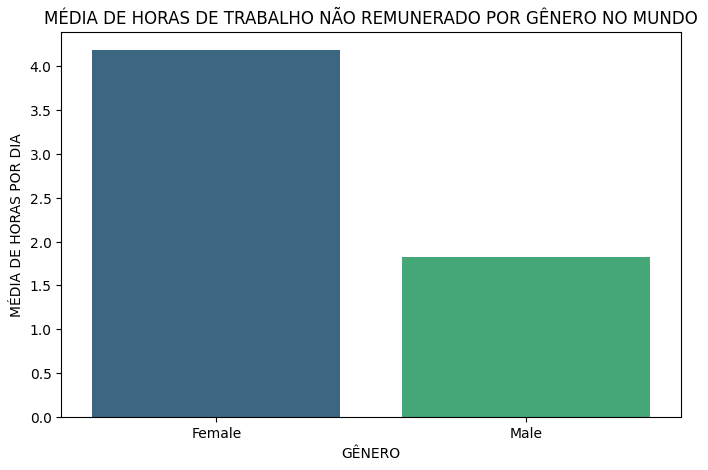

In [27]:
media_valor_por_genero = df.groupby('Genero')['Valor Observado'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')
plt.title('MÉDIA DE HORAS DE TRABALHO NÃO REMUNERADO POR GÊNERO NO MUNDO')
plt.xlabel('GÊNERO')
plt.ylabel('MÉDIA DE HORAS POR DIA')
plt.show()


Há uma relevante disparidade de gênero no mundo, em relação aos trabalhos não remunerados (domésticos)

In [28]:
print("Média de horas de trabalho não remunerado por gênero:")
print(media_valor_por_genero)

Média de horas de trabalho não remunerado por gênero:
   Genero  Valor Observado
0  Female         4.185880
1    Male         1.823523


In [ ]:
valores_unicos = df['Regiao SDG'].unique()
valores_unicos


## Média de horas trabalhadas por gênero, por região:

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


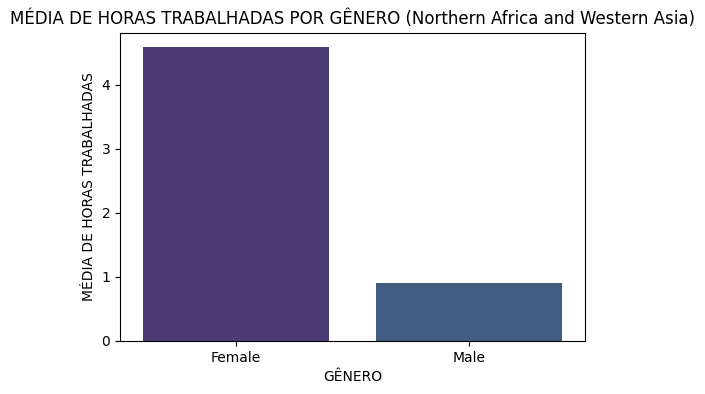

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


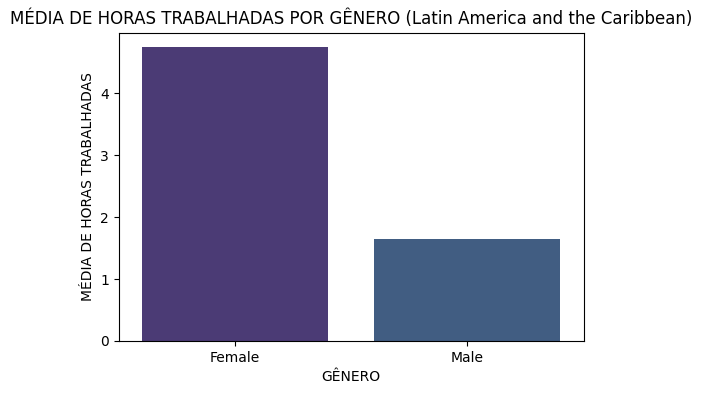

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


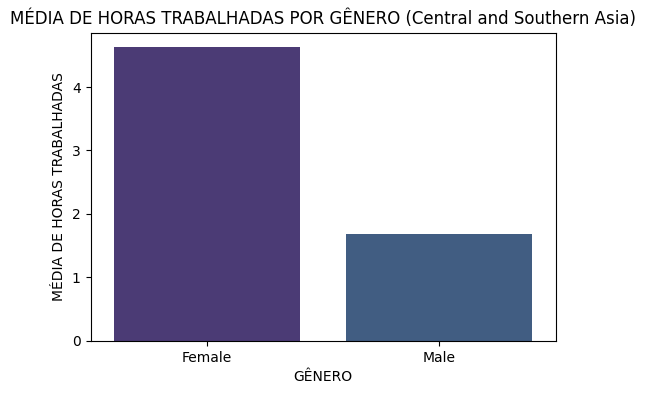

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


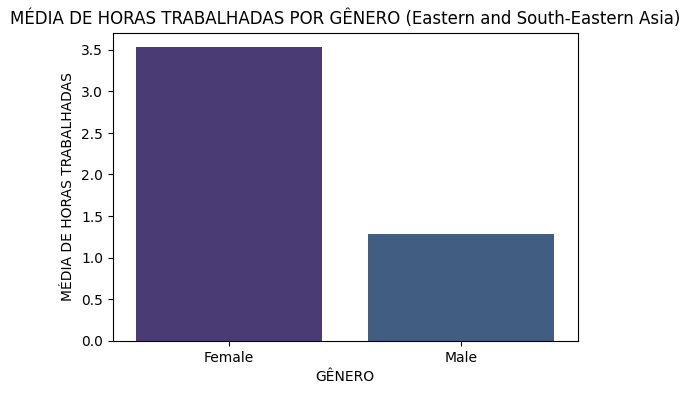

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


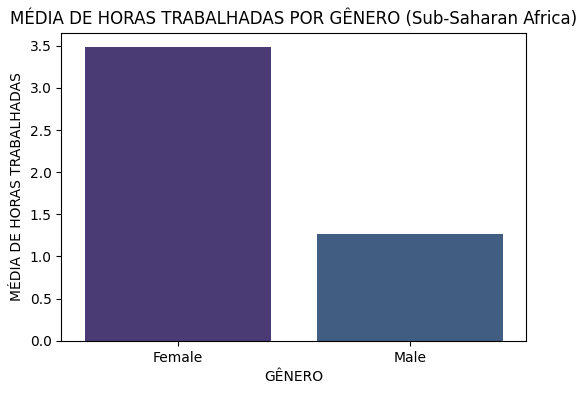

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


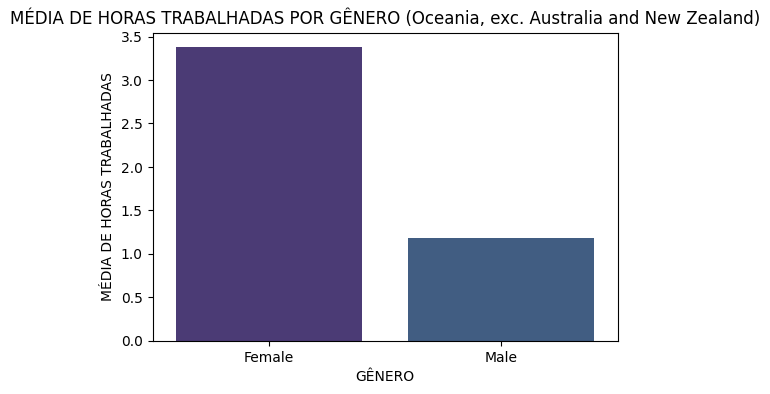

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


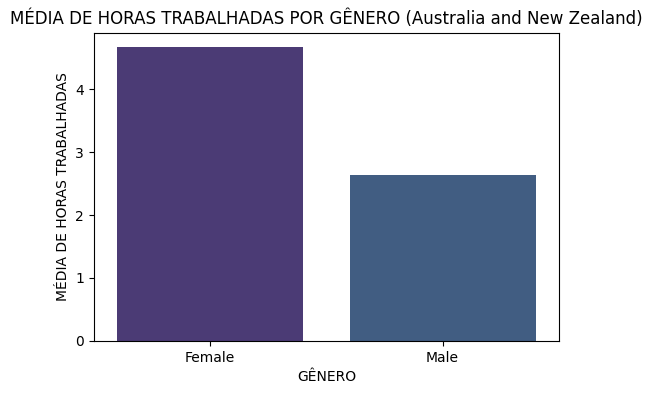

C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
C:\Users\santi\AppData\Local\Temp\ipykernel_192\809100870.py:19: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)


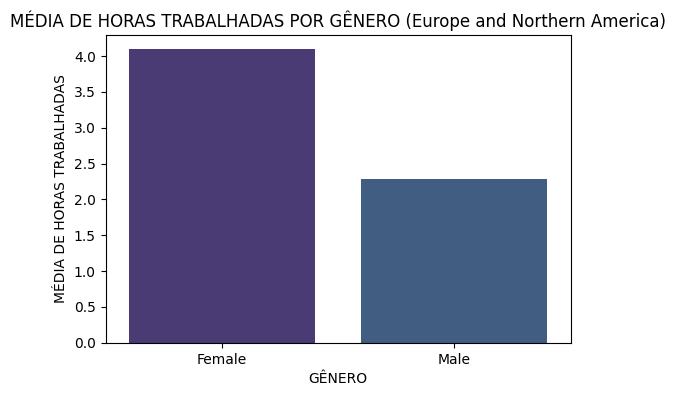

In [33]:
regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean',
           'Europe and Northern America', 'Sub-Saharan Africa',
           'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

proporcoes_regioes = []

cores = sns.color_palette('viridis')

for regiao in regioes:
    df_regiao = df[df['Regiao SDG'] == regiao]
    proporcao_horas = df_regiao.groupby('Genero')['Valor Observado'].mean()
    proporcoes_regioes.append((regiao, proporcao_horas))

proporcoes_regioes.sort(key=lambda x: abs(x[1]['Female'] - x[1]['Male']), reverse=True)

for regiao, proporcao_horas in proporcoes_regioes:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette=cores)
    plt.title(f'MÉDIA DE HORAS TRABALHADAS POR GÊNERO ({regiao})')
    plt.xlabel('GÊNERO')
    plt.ylabel('MÉDIA DE HORAS TRABALHADAS')
    plt.show()
    

## Média de valores observados por região, para o gênero feminino

 O objetivo do próximo gráfico é apresentar a média dos valores observados para o trabalho não remunerado do gênero feminino em diferentes regiões. Ele busca fornecer uma visão comparativa das médias, permitindo identificar quais regiões têm uma média mais alta em termos de trabalho não remunerado para mulheres.

Região: Northern Africa and Western Asia
Média de horas trabalhadas para Feminino: 4.582303777522424
Média de horas trabalhadas para Masculino: 0.9092186881258254
Diferença de média de horas: 3.6730850893965985
------------------------------
Região: Latin America and the Caribbean
Média de horas trabalhadas para Feminino: 4.74589871503521
Média de horas trabalhadas para Masculino: 1.6489433009562604
Diferença de média de horas: 3.0969554140789497
------------------------------
Região: Central and Southern Asia
Média de horas trabalhadas para Feminino: 4.623333333333333
Média de horas trabalhadas para Masculino: 1.6828571428571428
Diferença de média de horas: 2.9404761904761902
------------------------------
Região: Eastern and South-Eastern Asia
Média de horas trabalhadas para Feminino: 3.52903491153861
Média de horas trabalhadas para Masculino: 1.2787207201842852
Diferença de média de horas: 2.2503141913543248
------------------------------
Região: Sub-Saharan Africa
Média de horas tr

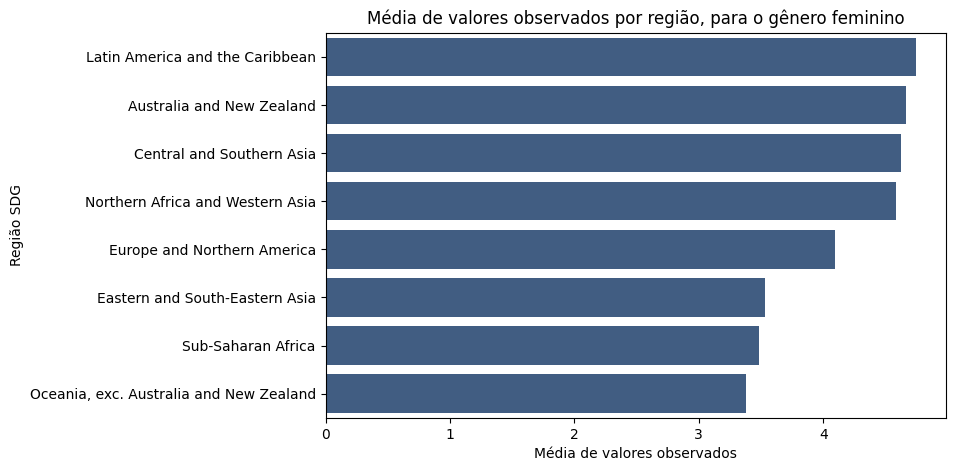

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de regiões
regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean',
           'Europe and Northern America', 'Sub-Saharan Africa',
           'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

# Lista para armazenar proporções de horas por região
proporcoes_regioes = []

# Paleta de cores
cores = sns.color_palette('viridis')

# Loop sobre as regiões
for regiao in regioes:
    df_regiao = df[df['Regiao SDG'] == regiao]
    proporcao_horas = df_regiao.groupby('Genero')['Valor Observado'].mean()
    proporcoes_regioes.append((regiao, proporcao_horas))

# Ordena as regiões com base na maior diferença de médias de horas
proporcoes_regioes.sort(key=lambda x: abs(x[1]['Female'] - x[1]['Male']), reverse=True)

# Imprime as informações para cada região
for regiao, proporcao_horas in proporcoes_regioes:
    print(f'Região: {regiao}')
    print(f'Média de horas trabalhadas para Feminino: {proporcao_horas["Female"]}')
    print(f'Média de horas trabalhadas para Masculino: {proporcao_horas["Male"]}')
    print(f'Diferença de média de horas: {abs(proporcao_horas["Female"] - proporcao_horas["Male"])}')
    print('-' * 30)

# Plotagem do gráfico para o gênero feminino
media_feminino_por_regiao = df[df['Genero'] == 'Female'].groupby('Regiao SDG')['Valor Observado'].mean()
media_feminino_por_regiao = media_feminino_por_regiao.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=media_feminino_por_regiao, y=media_feminino_por_regiao.index, color=sns.color_palette('viridis')[1])
plt.title('Média de valores observados por região, para o gênero feminino')
plt.xlabel('Média de valores observados')
plt.ylabel('Região SDG')
plt.show()




A região Latin America and the Caribbean apresenta a maior média de valores observados para o trabalho não remunerado do gênero feminino, indicando uma tendência de alta incidência nesse tipo de trabalho na região.


Australia and New Zealand, Central and Southern Asia e Northern Africa and Western Asia' ocupam as posições seguintes, com diferenças relativamente pequenas entre suas médias. Isso sugere que essas regiões estão próximas em termos de médias, indicando similaridades em relação ao trabalho não remunerado do gênero feminino.

Europe and Northern America, apesar de ocupar a quinta posição, mostra uma diferença moderada em relação às primeiras regiões. Isso indica que, embora esteja em uma posição intermediária, a disparidade em trabalho não remunerado do gênero feminino é menor do que em algumas outras regiões.

Eastern and South-Eastern Asia, apesar de estar em uma posição intermediária, já apresenta uma diferença mais considerável em relação às regiões superiores. Isso sugere uma variação mais significativa nessa parte do gráfico.


Sub-Saharan Africa e Oceania, exc. Australia and New Zealand, encontram-se nas últimas posições, indicando que essas regiões têm, em média, uma incidência menor de trabalho não remunerado do gênero feminino em comparação com as demais regiões.

##  Faixa etária com mais horas trabalhadas por dia, para o gênero feminino e em cada região

In [66]:

df_female = df[df['Genero'] == 'Female']

regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean', 'Europe and Northern America',
           'Sub-Saharan Africa', 'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

for regiao in regioes:
    df_regiao = df_female[df_female['Regiao SDG'] == regiao]

    if not df_regiao.empty:
        faixa_etaria_mais_alta = df_regiao.groupby('Idade')['Valor Observado'].mean().idxmax()

        df_faixa_etaria_mais_alta = df_regiao[df_regiao['Idade'] == faixa_etaria_mais_alta]

        media_horas_faixa_etaria_mais_alta = df_faixa_etaria_mais_alta['Valor Observado'].mean()

        print(f"Região: {regiao}, Faixa Etária com mais Trabalho: {faixa_etaria_mais_alta}, Média de Horas: {media_horas_faixa_etaria_mais_alta:.2f} horas por dia")



Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por dia
Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia
Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia
Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia
Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia
Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia
Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia
Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 ho

# Por ordem de menor idade na faixa etária com maior carga de trabalho e maior média de horas/dia se idade igual:

Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia

Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por diaa

Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia

Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia

Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia

Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia

Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 horas por dia

Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia

FAIXA ETÁRIA COM MAIS HORAS DE TRABALHO NÃO REMUNERADO PARA O GÊNERO FEMININO, EM CADA REGIÃO, NOS GRÁFICOS:


Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


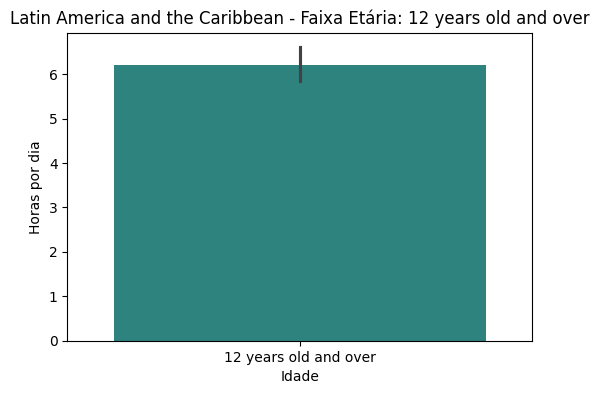

Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


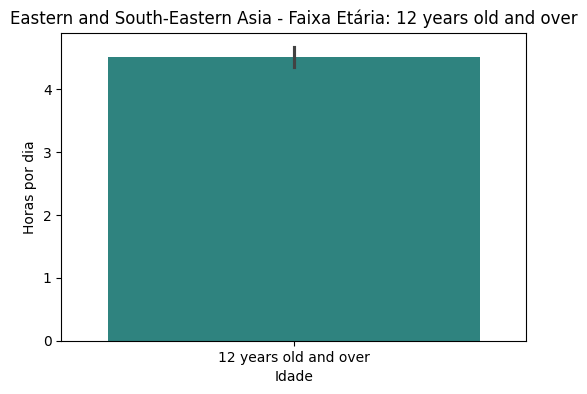

Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


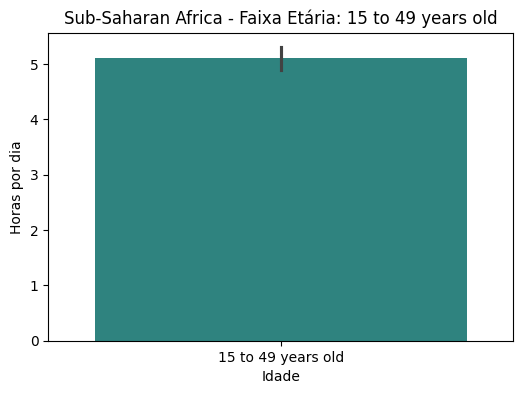

Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


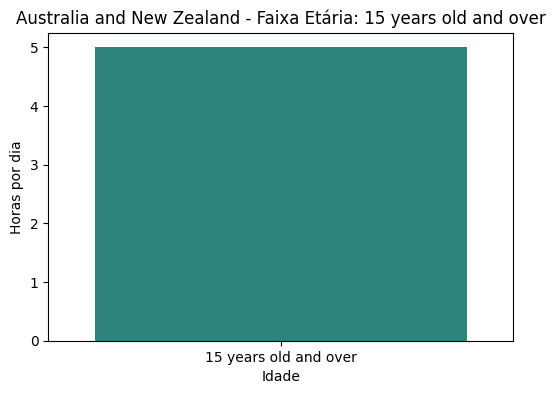

Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


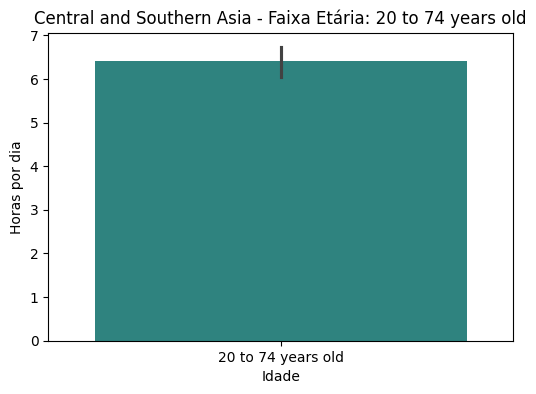

Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


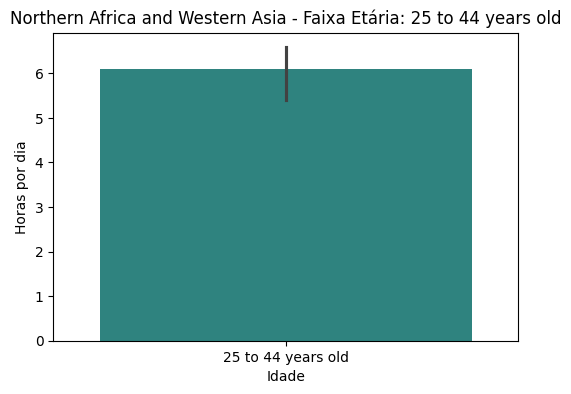

Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


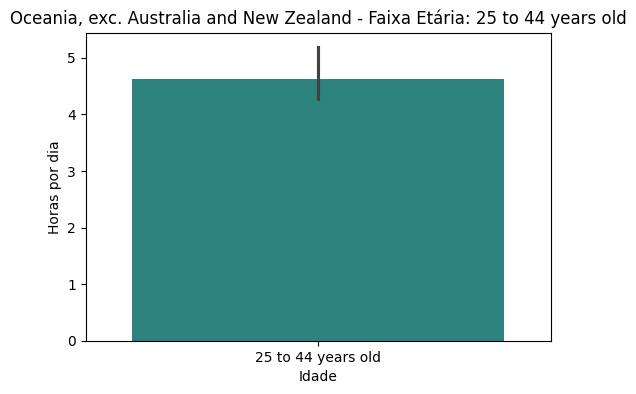

Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_192\297618913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


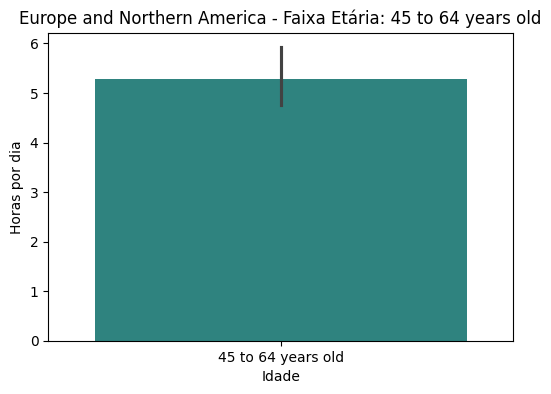

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df_female = df[df['Genero'] == 'Female']

regioes = [
    ('Latin America and the Caribbean', '12 years old and over'),
    ('Eastern and South-Eastern Asia', '12 years old and over'),
    ('Sub-Saharan Africa', '15 to 49 years old'),
    ('Australia and New Zealand', '15 years old and over'),
    ('Central and Southern Asia', '20 to 74 years old'),
    ('Northern Africa and Western Asia', '25 to 44 years old'),
    ('Oceania, exc. Australia and New Zealand', '25 to 44 years old'),
    ('Europe and Northern America', '45 to 64 years old')
]

for regiao, faixa_etaria in regioes:
    df_regiao = df_female[(df_female['Regiao SDG'] == regiao) & (df_female['Idade'] == faixa_etaria)]

    if not df_regiao.empty:
        media_horas_faixa_etaria = df_regiao['Valor Observado'].mean()

        print(f"Região: {regiao}, Faixa Etária com mais Trabalho: {faixa_etaria}, Média de Horas: {media_horas_faixa_etaria:.2f} horas por dia")

        # Crie apenas um gráfico por região
        plt.figure(figsize=(6, 4))
        sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')
        plt.title(f'{regiao} - Faixa Etária: {faixa_etaria}') 
        plt.xlabel('Idade')
        plt.ylabel('Horas por dia')
        plt.show()



## Conclusões

Observamos uma clara disparidade entre gêneros, com as mulheres dedicando, em média, 4.19 horas por dia a atividades não remuneradas, enquanto os homens dedicam uma média de 1.82 horas. Essa diferença substancial destaca a desigualdade persistente no compartilhamento de responsabilidades domésticas e de cuidado.

- Analisando as médias de horas de trabalho não remunerado por região, constatamos diferenças marcantes. A Latin America and the Caribbean lidera com a maior média para o gênero feminino, indicando uma alta incidência de trabalho não remunerado nessa região. Regiões como Northern Africa and Western Asia e Central and Southern Asia também apresentam disparidades significativas entre gêneros.

- Ao avaliar a média de valores observados para o trabalho não remunerado do gênero feminino, a região Latin America and the Caribbean destaca-se como a mais impactada. Regiões como Australia and New Zealand, Central and Southern Asia e Northern Africa and Western Asia ocupam posições subsequentes, indicando similaridades relativas em termos de médias.

- Ao observar as faixas etárias, diferentes padrões emergem. Regiões como Northern Africa and Western Asia e Central and Southern Asia mostram uma tendência de aumento nas médias de horas dedicadas ao trabalho não remunerado com o avançar da faixa etária. Por outro lado, regiões como Oceania, exc. Australia and New Zealand, demonstram uma média mais elevada para faixas etárias mais jovens.

Esses resultados destacam a complexidade das dinâmicas de trabalho não remunerado em escala global, influenciadas por fatores culturais, socioeconômicos e demográficos. A necessidade de ações para promover uma distribuição mais equitativa dessas responsabilidades é evidente, visando alcançar uma sociedade mais igualitária e justa.








# Iniciativas visando descontruir estereótipos de gênero ao influenciar a cultura das sociedades

O setor privado pode colaborar criando produtos que atuem na cultura da sociedade, quebrando estereótipos de gênero, por exemplo:

Criando jogos que incorporem narrativas que desafiem estereótipos de gênero, mostrando personagens femininas e masculinas envolvidos em uma variedade de atividades, profissões e papéis familiares;

Organizando hackatons e workshops de tecnologia exclusivos para meninas, proporcionando um ambiente inclusivo e encorajador;

Organizando eventos com palestrantes femininas inspiradoras que compartilhem suas histórias de sucesso nas áreas STEM em profissões tidas como masculinas,

A indústria audiovisual garantir a representação diversificada de personagens em termos de gênero, etnia, habilidades, etc.
Trabalhar em parceria com organizações não-governamentais (ONGs) especializadas em igualdade de gênero para garantir que a mensagem seja autêntica e baseada em boas práticas.
Envolvendo consultores especializados em questões de gênero para garantir que os produtos desenvolvidos estejam alinhados com as melhores práticas e não reproduzam estereótipos.

O setor público poderia organizar eventos e conferências que destaquem as melhores práticas e cases de sucesso do setor privado na promoção da igualdade de gênero;

Incentivar empresas a colaborarem com organizações não-governamentais especializadas em igualdade de gênero, proporcionando apoio financeiro e estrutural para iniciativas conjuntas;

Instituir programas de reconhecimento e certificações para empresas que demonstrarem compromisso efetivo com a promoção da igualdade de gênero em seus produtos e práticas;

Criar incentivos fiscais para empresas que desenvolvam e promovam produtos, como jogos, workshops e eventos, que contribuam para a desconstrução de estereótipos de gênero;

Promover campanhas sociais que desconstroem estereótipos de gênero, desafiando a ideia tradicional de que o trabalho doméstico é responsabilidade exclusiva das mulheres,

Fomentar programas de engajamento comunitário que incentivem a participação de homens em tarefas domésticas e destaquem os benefícios de uma abordagem mais equitativa.

Campanhas nas escolas que envolvam toda a família em conversas sobre como homens e mulheres podem realizar todas as tarefas e profissões, desafiando estereótipos que limitam certas atividades a um gênero específico. Conversas abertas sobre as expectativas em relação às tarefas domésticas, explicando que todos os membros da família contribuem para manter um lar funcional.